In [1]:
import matplotlib.pyplot as plt #plotting
import numpy as np #vectorized operations
import pandas as pd #data analysis

import pandas_datareader as pdr #wrapper to import data
import datetime as dt #date-time objects

import statsmodels.api as sms ## X and Y are the inputs, their dimen need to match!!

import statsmodels.api as sm

import statsmodels.formula.api as sma


In [2]:
DataDow=pd.read_csv('./DowPrice.csv')
DataDow

,Date,Open,High,Low,Close,Volume
0,1999-12-31,10876.50,11568.80,10859.70,11497.10,3166533039
1,2000-01-31,11501.80,11750.30,10701.60,10940.50,3854528039
2,2000-02-29,10937.70,11118.90,9836.06,10128.30,3661494695
3,2000-03-31,10128.10,11234.70,9731.81,10921.90,4755115957
4,2000-04-30,10863.30,11425.50,10201.50,10733.90,4049373321
...,...,...,...,...,...,...
249,2020-09-30,28439.61,29199.35,26537.01,27781.70,11075015810
250,2020-10-31,27940.63,28957.90,26143.77,26501.60,9685912322
251,2020-11-30,26691.28,30116.51,26691.28,29638.64,9628608626
252,2020-12-31,29797.50,30637.47,29599.29,30606.48,9698038696


In [3]:
def close_to_close_returns(adj_close): # Adjusted Close prices
    return adj_close / adj_close.shift() - 1 # use the shift function to compute the daily returns
for i in [DataDow]:
    i['ret'] = close_to_close_returns(i['Close'])
DataDow=DataDow.dropna()
DataDow

,Date,Open,High,Low,Close,Volume,ret
1,2000-01-31,11501.80,11750.30,10701.60,10940.50,3854528039,-0.048412
2,2000-02-29,10937.70,11118.90,9836.06,10128.30,3661494695,-0.074238
3,2000-03-31,10128.10,11234.70,9731.81,10921.90,4755115957,0.078355
4,2000-04-30,10863.30,11425.50,10201.50,10733.90,4049373321,-0.017213
5,2000-05-31,10749.40,10971.20,10258.80,10522.30,3816890173,-0.019713
...,...,...,...,...,...,...,...
249,2020-09-30,28439.61,29199.35,26537.01,27781.70,11075015810,-0.022805
250,2020-10-31,27940.63,28957.90,26143.77,26501.60,9685912322,-0.046077
251,2020-11-30,26691.28,30116.51,26691.28,29638.64,9628608626,0.118372
252,2020-12-31,29797.50,30637.47,29599.29,30606.48,9698038696,0.032655


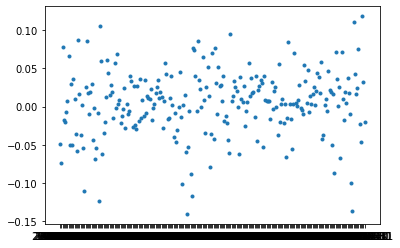

In [4]:
plt.plot(DataDow['Date'],DataDow['ret'],'.')

In [5]:
DataUE=pd.read_csv('./UNRATE.csv')

DataUE=DataUE[624:877]
DataUE.index = np.arange(1,len(DataUE)+1)
DataUE

,DATE,UNRATE
1,2000-01-01,4.0
2,2000-02-01,4.1
3,2000-03-01,4.0
4,2000-04-01,3.8
5,2000-05-01,4.0
...,...,...
249,2020-09-01,7.8
250,2020-10-01,6.9
251,2020-11-01,6.7
252,2020-12-01,6.7


In [43]:
DataCPI=pd.read_csv('./CPIAUCSL.csv')
DataCPI=DataCPI[636:889]
DataCPI.index = np.arange(1,len(DataCPI)+1)
DataCPI

,DATE,CPIAUCSL
1,2000-01-01,169.300
2,2000-02-01,170.000
3,2000-03-01,171.000
4,2000-04-01,170.900
5,2000-05-01,171.200
...,...,...
249,2020-09-01,260.149
250,2020-10-01,260.462
251,2020-11-01,260.927
252,2020-12-01,261.560


In [55]:
DataPPI=pd.read_csv('./PPIACO.csv')
DataPPI=DataPPI[1044:1297]
DataPPI.index=np.arange(1,len(DataPPI)+1)
DataPPI


,DATE,PPIACO
1,2000-01-01,128.3
2,2000-02-01,129.8
3,2000-03-01,130.8
4,2000-04-01,130.7
5,2000-05-01,131.6
...,...,...
249,2020-09-01,195.5
250,2020-10-01,196.5
251,2020-11-01,198.3
252,2020-12-01,200.6


In [64]:
DataPCE=pd.read_csv('./PCE.csv')
DataPCE=DataPCE[492:745]
DataPCE.index=np.arange(1,len(DataPCE)+1)
DataPCE

,DATE,PCE
1,2000-01-01,6535.3
2,2000-02-01,6619.7
3,2000-03-01,6685.8
4,2000-04-01,6671.1
5,2000-05-01,6707.6
...,...,...
249,2020-09-01,14582.7
250,2020-10-01,14627.1
251,2020-11-01,14532.8
252,2020-12-01,14451.1


In [6]:
DataGDP=pd.read_csv('./US-Monthly-GDP-History-Data.csv')
DataGDP=DataGDP.dropna()
DataGDP=DataGDP[95:349]
for i in [DataGDP]:
    i['Adj_RGDP'] = close_to_close_returns(i['Monthly Real GDP Index'])
#DataGDP.index = np.arange(1,len(DataGDP)+1)
DataGDP=DataGDP.dropna()
DataGDP.index = np.arange(1,len(DataUE)+1)
DataGDP

,Date,Monthly Nominal GDP Index,Monthly Real GDP Index,Adj_RGDP
1,2000 - Jan,9920.560,12857.908,-0.011288
2,2000 - Feb,9998.869,12920.764,0.004889
3,2000 - Mar,10089.142,12993.210,0.005607
4,2000 - Apr,10222.118,13156.939,0.012601
5,2000 - May,10230.799,13141.686,-0.001159
...,...,...,...,...
249,2020 - Sep,21470.851,18833.535,0.014036
250,2020 - Oct,21636.504,18946.111,0.005977
251,2020 - Nov,21381.004,18711.035,-0.012408
252,2020 - Dec,21451.855,18702.817,-0.000439


In [80]:
Data=pd.DataFrame({'Date':DataDow['Date'],'ret':DataDow['ret'],'RGDP':DataGDP['Monthly Real GDP Index'],'UE':DataUE['UNRATE']})
Data_adj=pd.DataFrame({'Date':DataDow['Date'],'ret':DataDow['ret'],'RGDP':DataGDP['Adj_RGDP'],'UE':DataUE['UNRATE']})
Data1=pd.DataFrame({'ret':DataDow['ret'],'RGDP':DataGDP['Monthly Real GDP Index'],'UE':DataUE['UNRATE']})
DataReg=pd.DataFrame({'Date':DataDow['Date'],'price':DataDow['Close'],'RGDP':DataGDP['Monthly Real GDP Index'],'UE':DataUE['UNRATE'],'CPI':DataCPI['CPIAUCSL'],'PPI':DataPPI['PPIACO'],'PCE':DataPCE['PCE']})
DataReg1=pd.DataFrame({'price':DataDow['Close'],'RGDP':DataGDP['Monthly Real GDP Index'],'UE':DataUE['UNRATE'],'CPI':DataCPI['CPIAUCSL'],'PPI':DataPPI['PPIACO'],'PCE':DataPCE['PCE']})
DataReg




,Date,price,RGDP,UE,CPI,PPI,PCE
1,2000-01-31,10940.50,12857.908,4.0,169.300,128.3,6535.3
2,2000-02-29,10128.30,12920.764,4.1,170.000,129.8,6619.7
3,2000-03-31,10921.90,12993.210,4.0,171.000,130.8,6685.8
4,2000-04-30,10733.90,13156.939,3.8,170.900,130.7,6671.1
5,2000-05-31,10522.30,13141.686,4.0,171.200,131.6,6707.6
...,...,...,...,...,...,...,...
249,2020-09-30,27781.70,18833.535,7.8,260.149,195.5,14582.7
250,2020-10-31,26501.60,18946.111,6.9,260.462,196.5,14627.1
251,2020-11-30,29638.64,18711.035,6.7,260.927,198.3,14532.8
252,2020-12-31,30606.48,18702.817,6.7,261.560,200.6,14451.1


In [8]:


def multi_lin_least_squares_parameters(X, Y): # X is the matrix, Y is the column vector, we want to find \hat\beta
    X = sm.add_constant(X).values
    Y = Y.values
    if np.linalg.det(np.matmul(X.transpose(),X))==0: #linalg: linear algebra, np.matmul: marix multiplication
        return print('Data matrix is not invertible')
    else:
        return np.matmul(np.linalg.inv(np.matmul(X.transpose(),X)), np.matmul(X.transpose(),Y)) #(X^TX)^{-1}X^TY=\hat \beat

In [9]:
ml_params=multi_lin_least_squares_parameters(Data[['RGDP','UE']],Data['ret'])
ml_params

array([-4.86930578e-02,  2.08756212e-06,  3.34614582e-03])

In [10]:
ml_params1=multi_lin_least_squares_parameters(Data_adj[['RGDP','UE']],Data_adj['ret'])
ml_params1

array([-0.01477563,  0.19314905,  0.00320459])

In [70]:
ml_params2=multi_lin_least_squares_parameters(DataReg[['RGDP','UE','CPI','PPI','PCE']],DataReg['price'])
ml_params2

array([ 4.44871978e+04, -5.01362277e+00, -7.04261696e+02, -1.92828993e+01,
       -8.02156878e+01,  6.92907726e+00])

In [11]:
def multi_lin_best_fit_plane(X,Y):
    import statsmodels.api as sm
    X = sm.add_constant(X)
    params = multi_lin_least_squares_parameters(X,Y)
    Y_hat = np.matmul(X.values, params)
    return Y_hat

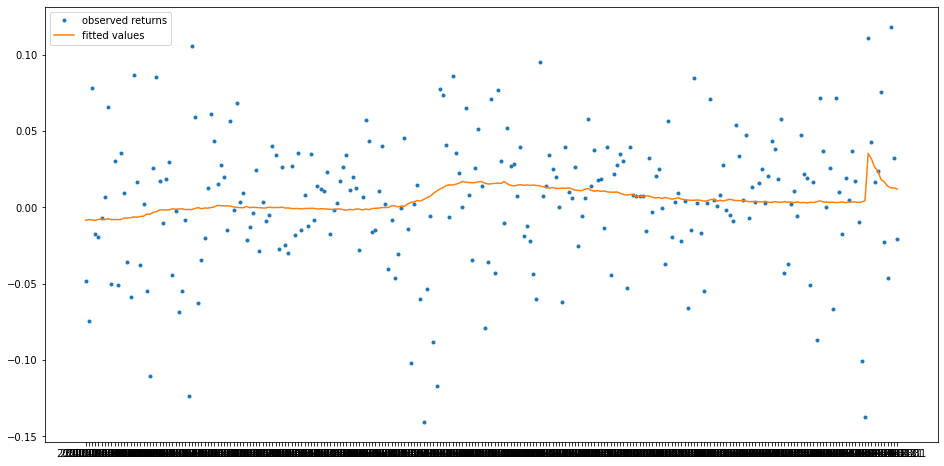

In [12]:
plt.figure(figsize=(16,8))
plt.plot(Data['Date'],Data['ret'],'.',label='observed returns')
#plt.plot(Data['Date'],Data['UE'],label='UE')
#plt.plot(Data['Date'],Data['RGDP'],label='RGDP')
plt.plot(Data['Date'],multi_lin_best_fit_plane(Data[['RGDP','UE']], Data['ret']), label='fitted values')
plt.legend();

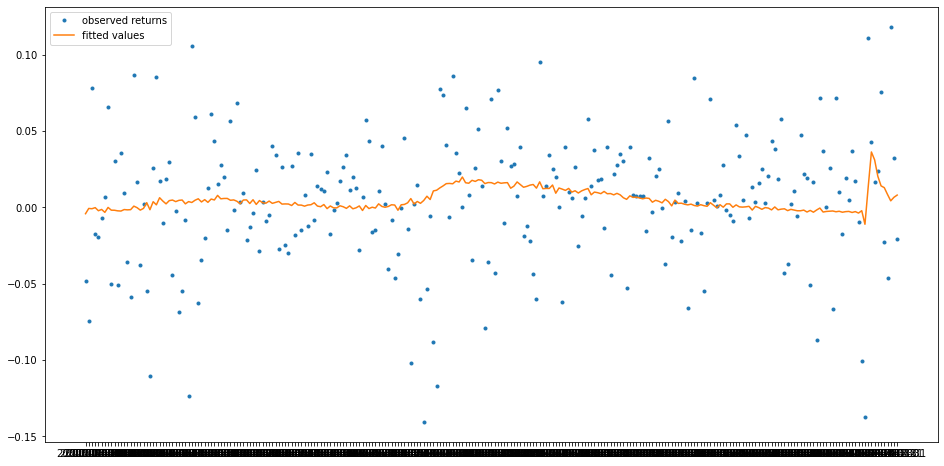

In [13]:
plt.figure(figsize=(16,8))
plt.plot(Data_adj['Date'],Data_adj['ret'],'.',label='observed returns')
#plt.plot(Data['Date'],Data['UE'],label='UE')
#plt.plot(Data['Date'],Data['RGDP'],label='RGDP')
plt.plot(Data['Date'],multi_lin_best_fit_plane(Data_adj[['RGDP','UE']], Data['ret']), label='fitted values')
plt.legend();

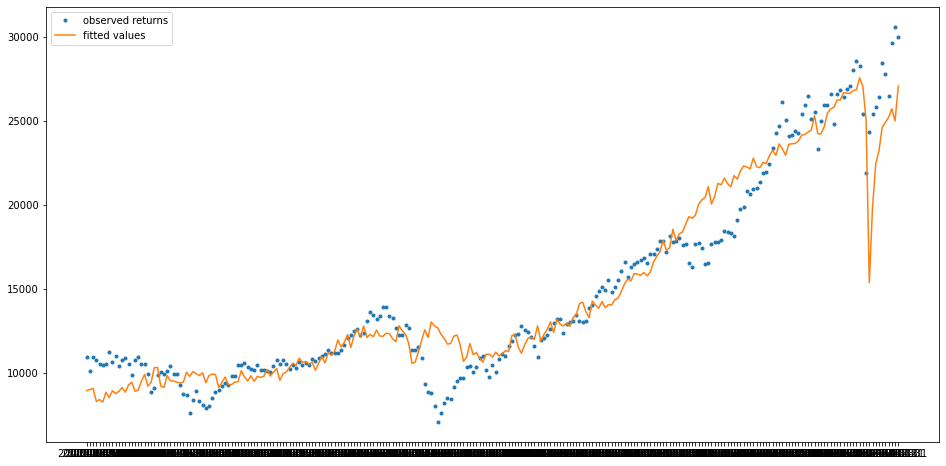

In [72]:
plt.figure(figsize=(16,8))
plt.plot(DataReg['Date'],DataReg['price'],'.',label='observed returns')
#plt.plot(Data['Date'],Data['UE'],label='UE')
#plt.plot(Data['Date'],Data['RGDP'],label='RGDP')
plt.plot(Data['Date'],multi_lin_best_fit_plane(DataReg[['RGDP','UE','CPI','PPI','PCE']], DataReg['price']), label='fitted values')
plt.legend();

In [14]:
model=sma.ols('ret ~ RGDP + UE',Data).fit()
print(model.params)

Intercept   -0.048693
RGDP         0.000002
UE           0.003346
dtype: float64


In [15]:
model1=sma.ols('ret ~ RGDP + UE',Data_adj).fit()
print(model.params)

Intercept   -0.048693
RGDP         0.000002
UE           0.003346
dtype: float64


In [82]:
model2=sma.ols('price ~ RGDP + UE + CPI + PPI + PCE',DataReg).fit()
print(model2.params)

Intercept    44487.197831
RGDP            -5.013623
UE            -704.261696
CPI            -19.282899
PPI            -80.215688
PCE              6.929077
dtype: float64


In [16]:
Data.corr()

,ret,RGDP,UE
ret,1.000000,0.072393,0.146748
RGDP,0.072393,1.000000,-0.096289
UE,0.146748,-0.096289,1.000000


In [17]:
Data_adj.corr()

,ret,RGDP,UE
ret,1.000000,0.039737,0.146748
RGDP,0.039737,1.000000,-0.040353
UE,0.146748,-0.040353,1.000000


In [73]:
DataReg.corr()

,price,RGDP,UE,CPI,PPI,PCE
price,1.000000,0.900663,-0.246411,0.843644,0.625318,0.900309
RGDP,0.900663,1.000000,-0.096289,0.971250,0.842452,0.994548
UE,-0.246411,-0.096289,1.000000,0.112780,0.236168,-0.022319
CPI,0.843644,0.971250,0.112780,1.000000,0.914369,0.986238
PPI,0.625318,0.842452,0.236168,0.914369,1.000000,0.856772
PCE,0.900309,0.994548,-0.022319,0.986238,0.856772,1.000000


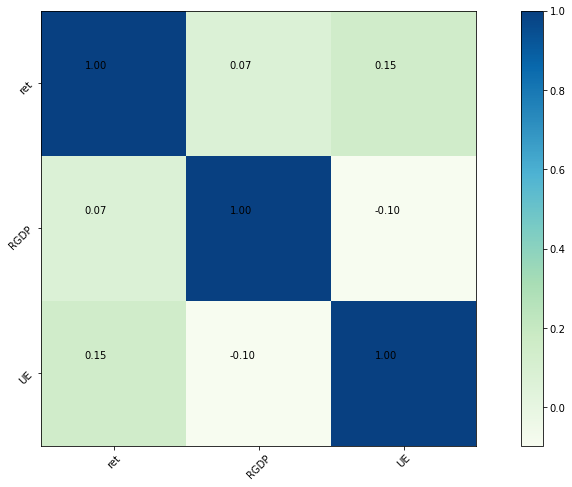

In [76]:
plt.figure(figsize=(16,8))
plt.imshow(Data1.corr(),cmap=plt.cm.GnBu,interpolation='nearest',data=True)
plt.colorbar()
tick_marks=[i for i in range(len(Data1.columns))]
plt.xticks(tick_marks,Data1.columns, rotation=45)
plt.yticks(tick_marks,Data1.columns, rotation=45)

for i in range(len(Data1.columns)):
    for j in range(len(Data1.columns)):
        text = '%.2f'%(Data1.corr().iloc[i,j])
        plt.text(i-0.2,j-0.1,text)

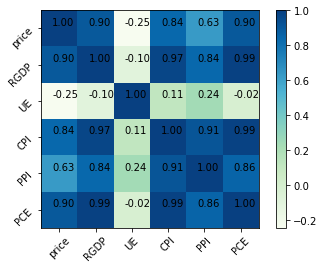

In [94]:
#plt.figure(figsize=(16,8))
plt.imshow(DataReg1.corr(),cmap=plt.cm.GnBu,interpolation='nearest',data=True)
plt.colorbar()
tick_marks=[i for i in range(len(DataReg1.columns))]
plt.xticks(tick_marks,DataReg1.columns, rotation=45)
plt.yticks(tick_marks,DataReg1.columns, rotation=45)

for i in range(len(DataReg1.columns)):
    for j in range(len(DataReg1.columns)):
        text = '%.2f'%(DataReg1.corr().iloc[i,j])
        plt.text(i-0.2,j-0.1,text)

In [19]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.021    
Dependent Variable: ret              AIC:                -880.6294
Date:               2021-04-20 09:45 BIC:                -870.0293
No. Observations:   253              Log-Likelihood:     443.31   
Df Model:           2                F-statistic:        3.745    
Df Residuals:       250              Prob (F-statistic): 0.0250   
R-squared:          0.029            Scale:              0.0017813
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept   -0.0487     0.0261   -1.8647   0.0634   -0.1001   0.0027
RGDP         0.0000     0.0000    1.3949   0.1643   -0.0000   0.0000
UE           0.0033     0.0014    2.4782   0.0139    0.0007   0.0060
------------------------------------------------------------------
O

In [20]:
print(model1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.016    
Dependent Variable: ret              AIC:                -879.2085
Date:               2021-04-20 09:45 BIC:                -868.6083
No. Observations:   253              Log-Likelihood:     442.60   
Df Model:           2                F-statistic:        3.024    
Df Residuals:       250              Prob (F-statistic): 0.0504   
R-squared:          0.024            Scale:              0.0017913
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept   -0.0148     0.0085   -1.7322   0.0845   -0.0316   0.0020
RGDP         0.1931     0.2642    0.7312   0.4653   -0.3271   0.7134
UE           0.0032     0.0013    2.3758   0.0183    0.0005   0.0059
------------------------------------------------------------------
O

In [83]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     510.5
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          5.52e-128
Time:                        10:53:15   Log-Likelihood:                -2247.0
No. Observations:                 253   AIC:                             4506.
Df Residuals:                     247   BIC:                             4527.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.449e+04   1.15e+04      3.869      0.0

In [85]:
def evaluatemodel(model):
    print("RSS=",((Data.ret-model.predict())**2).sum())
    print("R2=",model.rsquared)
    
def evaluatemodel1(model):
    print("RSS=",((Data_adj.ret-model1.predict())**2).sum())
    print("R2=",model1.rsquared)
    
def evaluatemodel2(model):
    print("RSS=",((DataReg.price-model2.predict())**2).sum())
    print("R2=",model2.rsquared)

In [ ]:
#UE
model_UE=sma.ols('ret ~ UE',Data).fit()
evaluatemodel(model_UE)
print("------------")

#RGDP
model_RGDP=sma.ols('ret ~ RGDP',Data).fit()
evaluatemodel(model_RGDP)
print("------------")

#UE and RGDP
model_UE_RGDP=sma.ols('ret ~ UE + RGDP',Data).fit()
evaluatemodel(model_UE_RGDP)
print("------------")

In [22]:
#UE
model_UE=sma.ols('ret ~ UE',Data_adj).fit()
evaluatemodel(model_UE)
print("------------")

#RGDP
model_RGDP=sma.ols('ret ~ RGDP',Data_adj).fit()
evaluatemodel(model_RGDP)
print("------------")

#UE and RGDP
model_UE_RGDP=sma.ols('ret ~ UE + RGDP',Data_adj).fit()
evaluatemodel(model_UE_RGDP)
print("------------")

RSS= 0.4487904992469641
R2= 0.021535088190283824
------------
RSS= 0.4579437039879876
R2= 0.001579029216822181
------------
RSS= 0.4478327447525716
R2= 0.02362320986055877
------------


In [ ]:
Feature Selection

In [93]:
model2_RGDP=sma.ols('price ~ RGDP',DataReg).fit()
evaluatemodel2(model2_RGDP)
print("------------")
model2_UE=sma.ols('price ~ UE',DataReg).fit()
evaluatemodel2(model2_UE)
print("------------")
model2_CPI=sma.ols('price ~ CPI',DataReg).fit()
evaluatemodel2(model2_CPI)
print("------------")
model2_PPI=sma.ols('price ~ PPI',DataReg).fit()
evaluatemodel2(model2_PPI)
print("------------")
model2_PCE=sma.ols('price ~ PCE',DataReg).fit()
evaluatemodel2(model2_PCE)
print("------------")

RSS= 767361247.5889894
R2= 0.9117744641164571
------------
RSS= 767361247.5889894
R2= 0.9117744641164571
------------
RSS= 767361247.5889894
R2= 0.9117744641164571
------------
RSS= 767361247.5889894
R2= 0.9117744641164571
------------
RSS= 767361247.5889894
R2= 0.9117744641164571
------------
